Iteración 0: θ0 = 0.9937, θ1 = 10780.4716
Iteración 100: θ0 = 0.6783, θ1 = 10780.4716
Iteración 200: θ0 = 0.5642, θ1 = 10780.4716
Iteración 300: θ0 = 0.5030, θ1 = 10780.4716
Iteración 400: θ0 = 0.4648, θ1 = 10780.4716
Iteración 500: θ0 = 0.4386, θ1 = 10780.4716
Iteración 600: θ0 = 0.4199, θ1 = 10780.4716
Iteración 700: θ0 = 0.4059, θ1 = 10780.4716
Iteración 800: θ0 = 0.3952, θ1 = 10780.4716
Iteración 900: θ0 = 0.3868, θ1 = 10780.4716


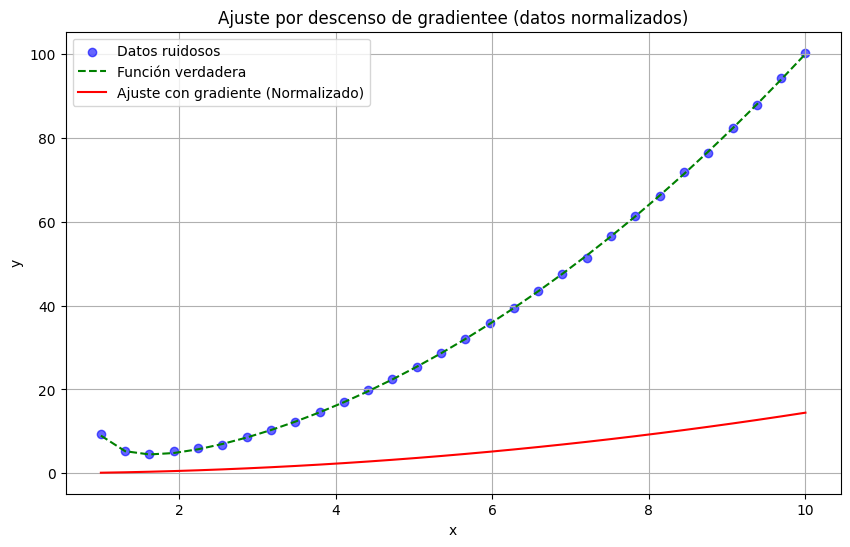

In [29]:
#utilizando el método convencional de gradiente visto en clases las iteraciones mostraban se convertían en "NaN".
#como solución ya que la función no es lineal encontré (en internet) la sugerencia de normalizar los datos y reducir el rango y sirivó
#no estoy seguro de la viabilidad del codigo, por lo que si no es del todo correcto me gustaría una retroalimentación del error en las iteraciones 

import numpy as np
import matplotlib.pyplot as plt

#normalizar datos primero
x_data_norm = (x_data - np.mean(x_data)) / np.std(x_data)
y_data_norm = (y_data - np.mean(y_data)) / np.std(y_data)

#funcion con datos normalizados
def y_theta_norm(x, theta):
    return (theta[0] * x)**2 + (theta[1] * x)**-3
    
#calculo los gradientes sin jax para evitar un error al hacerlo automático
def gradients_norm(x, y, theta):
    """Gradientes con datos normalizados."""
    y_pred = y_theta_norm(x, theta)
    error = y_pred - y
    grad_theta0 = np.mean(2 * error * 2 * theta[0] * x**2)
    grad_theta1 = np.mean(2 * error * -3 * (theta[1] * x)**-4 * x)
    return np.array([grad_theta0, grad_theta1])

#descenso de gradiente
theta = np.array([1.0, 1.0])  #asignar valores iniciales
learning_rate = 0.001  #tasa pequeña para reducir el error
iterations = 1000
history = []

for i in range(iterations):
    grad = gradients_norm(x_data_norm, y_data_norm, theta)
    theta -= learning_rate * grad
    history.append((i, theta.copy()))

#desnormalizar para interpretar
final_theta = theta

#iteraciones
specific_iterations = range(0, 901, 100)
for i, params in history:
    if i in specific_iterations:
        print(f"Iteración {i}: θ0 = {params[0]:.4f}, θ1 = {params[1]:.4f}")

#grafico
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Datos ruidosos', color='blue', alpha=0.6)
plt.plot(x_data, y_true, label='Función verdadera', color='green', linestyle='--')
plt.plot(x_data, y_theta_norm(x_data, final_theta), label='Ajuste con gradiente (Normalizado)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por descenso de gradientee (datos normalizados)')
plt.legend()
plt.grid()
plt.show()


Iteración 100, Suma cuadrados: 64.528046
Iteración 200, Suma cuadrados: 50.443554
Iteración 300, Suma cuadrados: 22.203653
Iteración 400, Suma cuadrados: 1.374085
Iteración 500, Suma cuadrados: 1.352419
Iteración 600, Suma cuadrados: 1.352412
Iteración 700, Suma cuadrados: 1.352412
Iteración 800, Suma cuadrados: 1.352412
Iteración 900, Suma cuadrados: 1.352412
Iteración 1000, Suma cuadrados: 1.352401
Parámetros optimizados: [1.0004888  0.49177524]
Iteración 0: θ0 = 0.9937, θ1 = 10780.4716
Iteración 100: θ0 = 0.6783, θ1 = 10780.4716
Iteración 200: θ0 = 0.5642, θ1 = 10780.4716
Iteración 300: θ0 = 0.5030, θ1 = 10780.4716
Iteración 400: θ0 = 0.4648, θ1 = 10780.4716
Iteración 500: θ0 = 0.4386, θ1 = 10780.4716
Iteración 600: θ0 = 0.4199, θ1 = 10780.4716
Iteración 700: θ0 = 0.4059, θ1 = 10780.4716
Iteración 800: θ0 = 0.3952, θ1 = 10780.4716
Iteración 900: θ0 = 0.3868, θ1 = 10780.4716


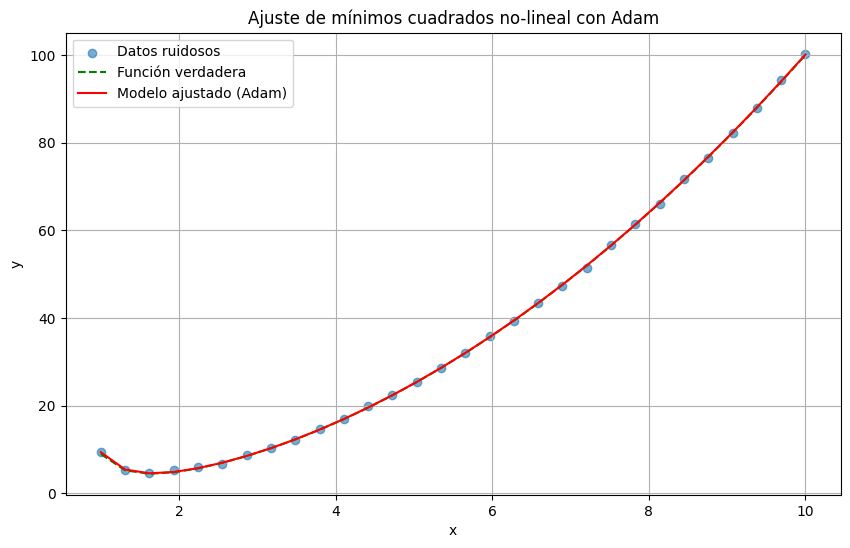

In [36]:
#ahora usando el metodo de ADAMs

import jax.numpy as jnp
from jax import grad

#def funcion
def y_theta(x, theta):
    return (theta[0] * x)**2 + (theta[1] * x)**-3

#funcion de perdida
def suma_cuadrados(theta, x, y):
    y_pred = y_theta(x, theta)
    return jnp.sum((y_pred - y)**2)

#gradiente
gradiente = grad(suma_cuadrados)

#método de Adam
def gradient_descent_adam(theta, x, y, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=1000):
    m, v = jnp.zeros_like(theta), jnp.zeros_like(theta)
    for t in range(1, iterations + 1):
        grads = gradiente(theta, x, y)
        m = beta1 * m + (1 - beta1) * grads
        v = beta2 * v + (1 - beta2) * (grads ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        theta = theta - learning_rate * m_hat / (jnp.sqrt(v_hat) + epsilon)

        if t % 100 == 0:
            loss = suma_cuadrados(theta, x, y)
            print(f"Iteración {t}, Suma cuadrados: {loss:.6f}")
    return theta

#parametros
theta_init = jnp.array([1.0, 1.0])

#ejecución
theta_opt = gradient_descent_adam(theta_init, x_data, y_data, learning_rate=0.001, iterations=1000)

print("Parámetros optimizados:", theta_opt)

specific_iterations = range(0, 901, 100)
for i, params in history:
    if i in specific_iterations:
        print(f"Iteración {i}: θ0 = {params[0]:.4f}, θ1 = {params[1]:.4f}")
#grafico
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Datos ruidosos", alpha=0.6)
plt.plot(x_data, y_true, label="Función verdadera", linestyle="--", color="green")
plt.plot(x_data, y_theta(x_data, theta_opt), label="Modelo ajustado (Adam)", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de mínimos cuadrados no-lineal con Adam")
plt.grid()
plt.show()


In [35]:
#las principales diferencias estan en la convergencia del ajuste, el metodo de adams es mucho mas preciso como se muestra
#en el metodo de gradiente en mi caso esta muy limitado por la tasa de aprendizaje que yo defini pues sino el resultado de las iteraciones tiende a mucho error
#adeemás el gradiente converge de manera muy lenta por lo que graficamente no alcanza a visualizarse a diferencia de adams
#en general Adam es as eficiente para realizar el ajuste que el gradiente convencional (sobretodo porque el código no trabaja muy bien para valores muy pequeños o muy grandes)